In [1]:
import json
import graphviz
import csv
import numpy as np
%matplotlib inline

ImportError: No module named 'graphviz'

In [2]:
pwd

'/home/ahoag/ngdemo/graphviz'

In [2]:
# csv_file = 'allen_id_table_w_voxel_counts.csv'

test_ontology_file = 'test_ontology.json'
with open(test_ontology_file) as json_file:
    test_data = json.load(json_file)
    
ontology_file = 'allen_ontology_16bit.json'
with open(ontology_file) as json_file:
    data = json.load(json_file)

## Get a list of all progeny of a given input nodename

In [3]:
# First need a make_graph() function to make the entire graph for visualization purposes
def make_graph(dic,graph):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    name = dic.get('name')
    children = dic.get('children')
    for child in children:
        child_name = child.get('name')
        graph.edge(name,child_name)
        make_graph(child,graph)
    return 

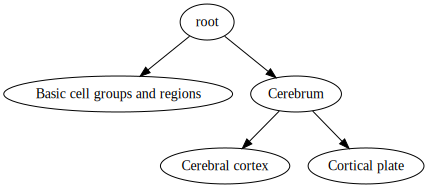

In [4]:
G = graphviz.Digraph()
make_graph(test_data,G)
G

In [5]:
# Now write the function to get all progeny of an input nodename
def get_progeny(dic,input_nodename,progeny_list):
    """ 
    """
    name = dic.get('name')
    children = dic.get('children')
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            progeny_list.append(child_name)
            get_progeny(child,input_nodename=child_name,progeny_list=progeny_list)
        return
    
    for child in children:
        child_name = child.get('name')
        get_progeny(child,input_nodename=input_nodename,progeny_list=progeny_list)
    return 

In [6]:
progeny_list = []
get_progeny(test_data,input_nodename='Cerebrum',progeny_list=progeny_list)
progeny_list

['Cerebral cortex', 'Cortical plate']

## Real Ontology file

In [7]:
allen_graph = graphviz.Digraph()
make_graph(data,allen_graph)
allen_graph

In [8]:
progeny_list = []
get_progeny(data,input_nodename='''Ammon's horn''',progeny_list=progeny_list)
progeny_list

['Field CA1',
 'Field CA1, stratum lacunosum-moleculare',
 'Field CA1, stratum oriens',
 'Field CA1, pyramidal layer',
 'Field CA1, stratum radiatum',
 'Field CA2',
 'Field CA2, stratum lacunosum-moleculare',
 'Field CA2, stratum oriens',
 'Field CA2, pyramidal layer',
 'Field CA2, stratum radiatum',
 'Field CA3',
 'Field CA3, stratum lacunosum-moleculare',
 'Field CA3, stratum lucidum',
 'Field CA3, stratum oriens',
 'Field CA3, pyramidal layer',
 'Field CA3, stratum radiatum']